### 0. Initialisation

In [115]:
save_path = "/Users/aljoscha/Downloads/locustVR_data"
save_plots = False

import os,json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import importlib

from LocustVR_data_analysis import utils_local

importlib.reload(utils_local)
from LocustVR_data_analysis.utils_local import default_style

### 2. Load data

In [116]:
df = pd.read_pickle(os.path.join(save_path, 'locustvr_data.pkl'))

In [117]:
df["X_aligned"] = -df["X_aligned"]
df["Y_flip"] = -df["Y_flip"]

In [118]:
grouped = df.groupby("animal_id")["trial_id"].agg(["max", "nunique"])
print(grouped)

           max  nunique
animal_id              
0           30       31
1           21       22
2           27       28
3           33       34
4           28       29
5           32       33
6           26       27
7           34       35
8            6        7
9           30       31
10          25       26
11          21       22
12          25       26
13          26       27
14          18       19
15          35       36
16          34       35
17          31       32
18          14       15
19          31       32
20          29       30
21          31       32
22          32       33
23          31       32
24          34       35
25          23       24
26          21       22
27          32       33
28          27       28
29          26       27
30           6        7
31          35       36
32          32       33
33           5        6
34          35       36


In [119]:
print(df)
print(df["heading_rel_flip"].max())
print(df["heading_rel_flip"].min())

                   X           Y   heading     ts  trial_id  state_type  \
0          -0.004847   -0.001845  1.378215  -9408         0           0   
1          -0.013489   -0.026297  1.335805  -9407         0           0   
2          -0.021833   -0.050318  1.335805  -9406         0           0   
3          -0.029885   -0.073905  1.408251  -9405         0           0   
4          -0.037650   -0.097059  1.408251  -9404         0           0   
...              ...         ...       ...    ...       ...         ...   
12465392  109.279552  171.646029  4.477734   5029        35           2   
12465393  109.280024  171.646185  4.333994   5030        35           2   
12465394  109.280513  171.646394  4.333994   5031        35           2   
12465395  109.281021  171.646658  4.379431   5032        35           2   
12465396  109.281547  171.646980  4.379431   5033        35           2   

          animal_id  heading_rel  heading_rel_flip  constant_distance  \
0                 0     0.

### 3. Visualisation

In [120]:
save_plots = False

position_version1 = ["X_aligned", "Y_flip"]
position_version2 = ["X_aligned", "Y_aligned"]
position_version = [position_version1, position_version2]
# position_version = [position_version2]

#### 3.1 Angle over time

#### 3.2 Desity of angles (for time bins)

##### 3.2.1 Histogram

#### 3.3 Trajectories

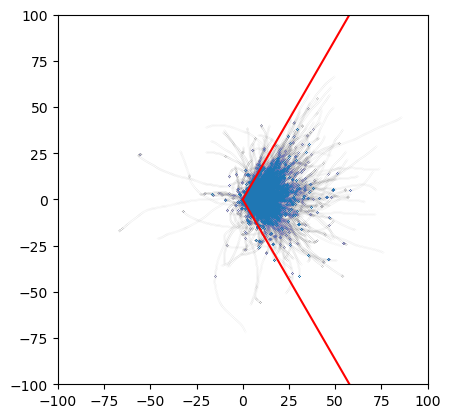

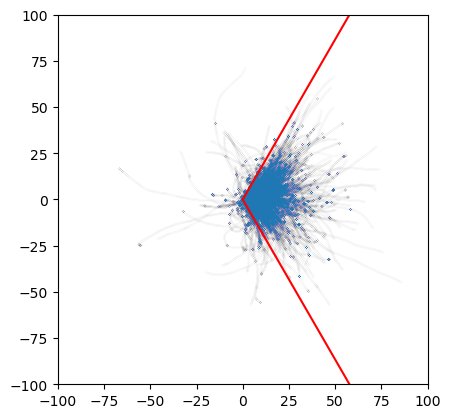

In [126]:
for version in position_version:
    mask = (df["ts"] >= 0) & (df["ts"] < 1000)
    plt.scatter(df.loc[mask, version[0]], df.loc[mask, version[1]], s=0.02, alpha=0.01)

    # plt.scatter(df.loc[mask, 'X'], df.loc[mask, 'Y'], s=0.06, alpha=0.03)
    # plt.scatter(df['X_aligned'][0:9494], df['Y_aligned'][0:9494], s=0.06, alpha=0.03)
    # plt.scatter(df['X'], df['Y'], s=0.06, alpha=0.03)#, c=df['trial_id'], cmap='viridis')
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    plt.gca().set_aspect('equal')

    X = np.linspace(0, 100, 500)

    # Calculate Y based on angle
    angle_deg = 60
    slope = np.tan(np.radians(angle_deg))

    Y = slope * X
    plt.plot(X, Y, color='red')
    plt.plot(X, -Y, color='red')
    # plt.savefig(os.path.join(save_path, f'locustvr_trajectories_{version[0]}.png'), format='png', dpi=300)
    plt.show()

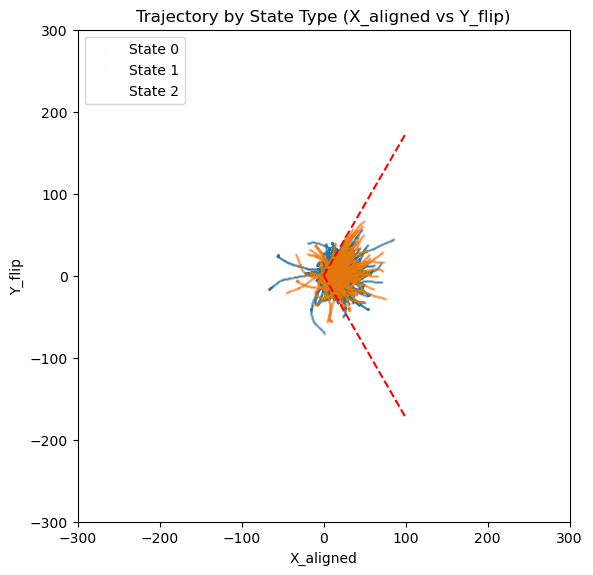

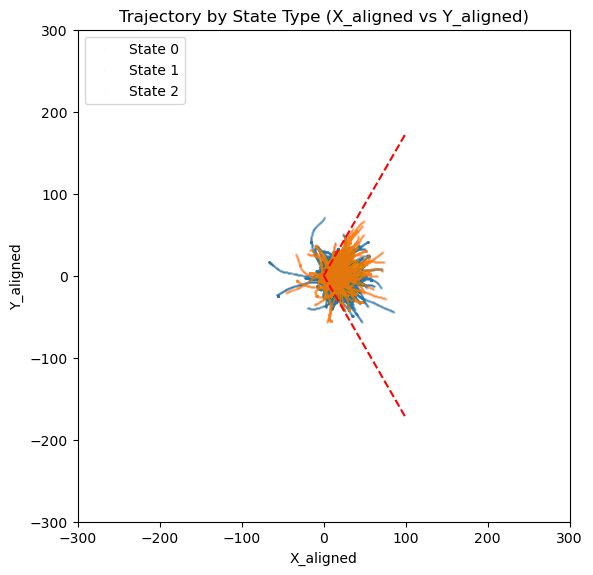

In [127]:
colors = {0: 'C2', 1: 'C0', 2: 'C1'}  # assign colors per state_type

for version in position_version:
    plt.figure(figsize=(6, 6))

    mask = (df["ts"] >= -0) & (df["ts"] < 1000)

    for state in [0, 1, 2]:
        state_mask = mask & (df["state_type"] == state)
        plt.scatter(
            df.loc[state_mask, version[0]],
            df.loc[state_mask, version[1]],
            s=0.2, alpha=0.06,
            label=f"State {state}",
            color=colors[state]
        )

    plt.xlim(-300, 300)
    plt.ylim(-300, 300)
    plt.gca().set_aspect('equal')

    # Add angle reference lines
    X = np.linspace(0, 100, 500)
    slope = np.tan(np.radians(60))
    plt.plot(X, slope * X, color='red', linestyle='--')
    plt.plot(X, -slope * X, color='red', linestyle='--')

    plt.legend(loc="upper left")
    plt.title(f"Trajectory by State Type ({version[0]} vs {version[1]})")
    plt.xlabel(version[0])
    plt.ylabel(version[1])
    plt.tight_layout()
    plt.show()

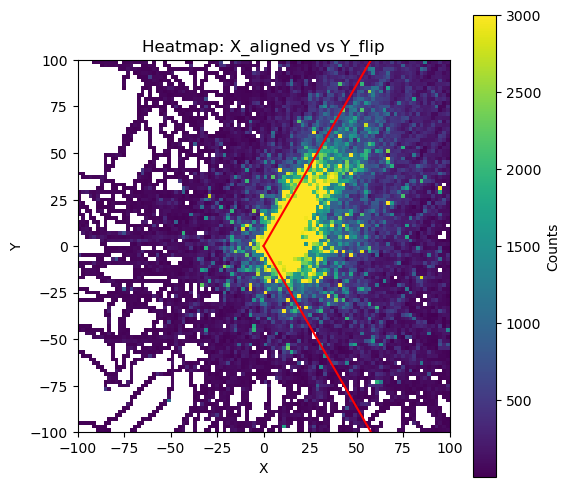

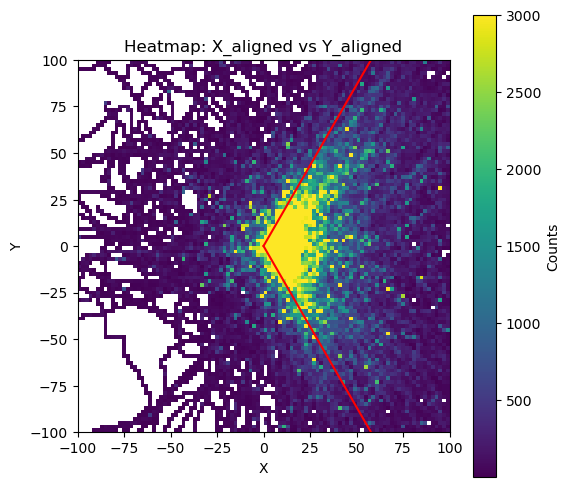

In [134]:
for version in position_version:
    mask = (df["ts"] >= 0) & (df["ts"] < 6000)
    x = df.loc[mask, version[0]]
    y = df.loc[mask, version[1]]

    fig, ax = plt.subplots(figsize=(6, 6))

    # 2D Histogram Heatmap
    heatmap = ax.hist2d(
        x, y,
        bins=[400, 400],
        range=[[-400, 400], [-400, 400]],
        cmap='viridis',
        density=False,
        cmin=1,     # hide empty bins
        vmax=3000    # optional: cap for contrast
    )
    fig.colorbar(heatmap[3], ax=ax).set_label("Counts")

    # ±60° guides
    X = np.linspace(0, 100, 500)
    angle_deg = 60
    slope = np.tan(np.radians(angle_deg))
    Y = slope * X
    ax.plot(X, Y, color='red')
    ax.plot(X, -Y, color='red')

    # Plot formatting
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.set_aspect('equal')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"Heatmap: {version[0]} vs {version[1]}")

    # Uncomment if saving
    # plt.savefig(os.path.join(save_path, f'locustvr_trajectories_heatmap_{version[0]}.png'), format='png', dpi=300)
    plt.show()

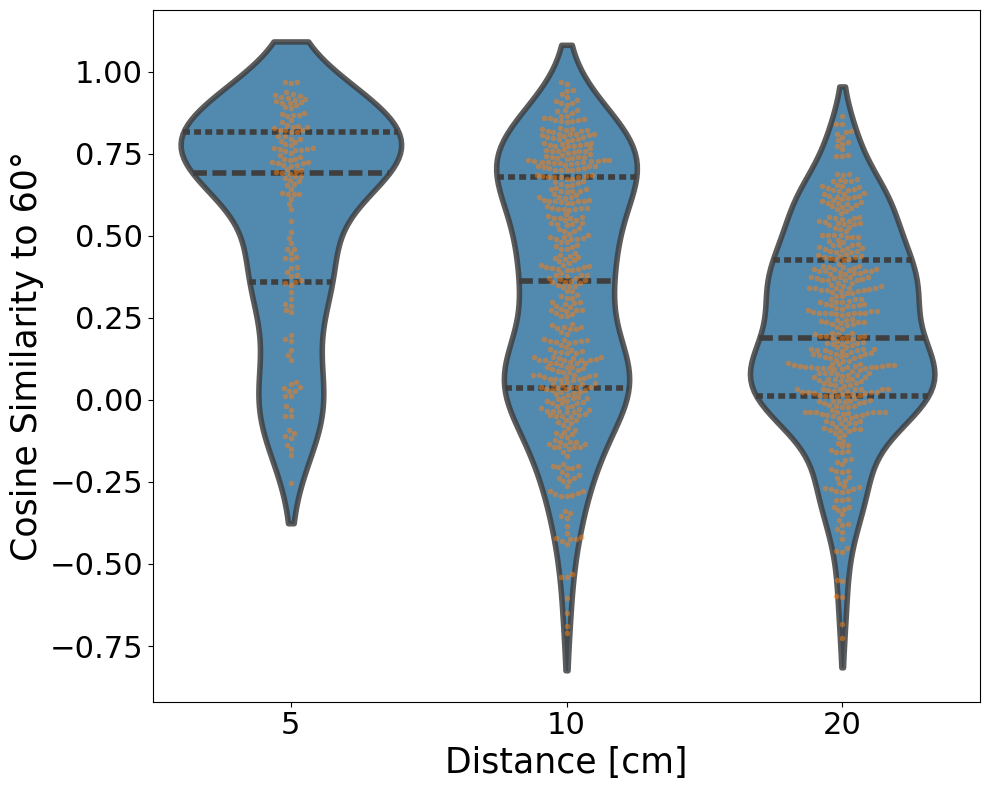

In [141]:
import numpy as np
import pandas as pd

def compute_trajectory_similarity_with_resultant(df,
                                                 x_col='X_aligned', y_col='Y_flip',
                                                 animal_col='animal_id', trial_col='trial_id',
                                                 distance_col='constant_distance', t_col='ts'):
    df = df.copy()

    # Filter time window [0, 6000]
    df = df[(df[t_col] >= 0) & (df[t_col] <= 1000)].copy()

    # Reference angles in radians
    ref_pos = np.radians(60)
    ref_neg = np.radians(-60)

    result_rows = []

    for (animal, trial), group in df.groupby([animal_col, trial_col]):
        group = group.sort_values(by=t_col).copy()

        # Compute trajectory angle from position deltas
        dx = group[x_col].diff().to_numpy()
        dy = group[y_col].diff().to_numpy()
        traj_angle = np.arctan2(dy, dx)

        # Drop first row (NaNs from diff)
        traj_angle = traj_angle[1:]
        valid_group = group.iloc[1:].copy()  # align with diffed arrays

        # Compute cosine similarity to reference directions
        cos_sim_pos = np.cos(traj_angle - ref_pos)
        cos_sim_neg = np.cos(traj_angle - ref_neg)

        # # Compute resultant vector length (R) for both targets
        # delta_pos = traj_angle - ref_pos
        # delta_neg = traj_angle - ref_neg
        #
        # R_pos = np.sqrt(np.mean(np.cos(delta_pos))**2 + np.mean(np.sin(delta_pos))**2)
        # R_neg = np.sqrt(np.mean(np.cos(delta_neg))**2 + np.mean(np.sin(delta_neg))**2)

        # Mean cosine similarity
        mean_sim_pos = np.mean(cos_sim_pos)
        mean_sim_neg = np.mean(cos_sim_neg)

        # Mean constant distance
        mean_distance = valid_group[distance_col].mean()

        result_rows.append({
            'animal_id': animal,
            'trial_id': trial,
            "directness": valid_group.loc[df["ts"]== 1,"directness"],
            'mean_cos_sim_to_60': mean_sim_pos,
            'mean_cos_sim_to_-60': mean_sim_neg,
            # 'R_to_60': R_pos,
            # 'R_to_-60': R_neg,
            'mean_constant_distance': round(mean_distance)
        })

    return pd.DataFrame(result_rows)

results4 = compute_trajectory_similarity_with_resultant(df, distance_col='constant_distance')
import seaborn as sns
plt.figure(figsize=(10, 8))
distance_order = sorted(results4["mean_constant_distance"].unique())
sns.violinplot(x="mean_constant_distance", y="mean_cos_sim_to_60", data=results4, inner="quartile", linewidth=4, order=distance_order, alpha=0.85, cut=1)
sns.swarmplot(x="mean_constant_distance", y="mean_cos_sim_to_60",
              data=results4, color='C1', size=4, order=distance_order, alpha=0.5)
default_style(x_label="Distance [cm]", y_label="Cosine Similarity to 60°")
plt.savefig(os.path.join(save_path, f'36.png'), format='png', dpi=1000)
plt.show()

In [142]:
print(results4["directness"])

0      9409    0.910002
Name: directness, dtype: float64
1      19740    0.853066
Name: directness, dtype: flo...
2      32473    0.252393
Name: directness, dtype: flo...
3      42702    0.665138
Name: directness, dtype: flo...
4      52894    0.846141
Name: directness, dtype: flo...
                             ...                        
956    12418357    0.400573
Name: directness, dtype: ...
957    12427305    0.659349
Name: directness, dtype: ...
958    12436485    0.494595
Name: directness, dtype: ...
959    12445781    0.898586
Name: directness, dtype: ...
960    12460364    0.939482
Name: directness, dtype: ...
Name: directness, Length: 961, dtype: object


/Users/aljoscha/miniforge3/envs/unity_analysis/lib/python3.11/site-packages/matplotlib/cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/aljoscha/miniforge3/envs/unity_analysis/lib/python3.11/site-packages/matplotlib/collections.py:200: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  offsets = np.asanyarray(offsets, float)


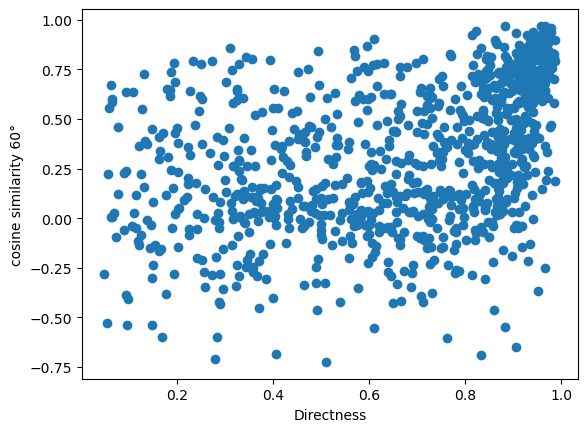

NaNs in 'directness': 0
NaNs in 'mean_cos_sim_to_60': 1


/var/folders/yv/pwckh1jd1q7_mprkvx3pxgnm0000gp/T/ipykernel_17947/1837271709.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = cleaned["directness"].to_numpy(dtype=float).reshape(-1, 1)


ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [143]:
plt.scatter(results4["directness"], results4["mean_cos_sim_to_60"])
plt.xlabel("Directness")
plt.ylabel("cosine similarity 60°")
plt.show()

print("NaNs in 'directness':", results4["directness"].isna().sum())
print("NaNs in 'mean_cos_sim_to_60':", results4["mean_cos_sim_to_60"].isna().sum())

# Check for infinities
# Drop rows where 'mean_cos_sim_to_60' is NaN
cleaned = results4.dropna(subset=["mean_cos_sim_to_60"]).copy()

# Extract features
x = cleaned["directness"].to_numpy().reshape(-1, 1)
y = cleaned["mean_cos_sim_to_60"].to_numpy()

# Clean target column
cleaned = results4.dropna(subset=["mean_cos_sim_to_60"]).copy()

# Convert to NumPy arrays
x = cleaned["directness"].to_numpy(dtype=float).reshape(-1, 1)
y = cleaned["mean_cos_sim_to_60"].to_numpy(dtype=float)

# Fit model
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x, y)

# Generate prediction range using raw NumPy
x_min = float(np.min(x))  # ensure scalar
x_max = float(np.max(x))
x_fit = np.linspace(x_min, x_max, 500).reshape(-1, 1)

# Predict
y_fit = model.predict(x_fit)

# Plot
plt.scatter(x, y, alpha=0.5)
plt.plot(x_fit, y_fit, color='red', label='Model Fit')
default_style(x_label='Directness', y_label='Cosine Similarity to 60°')
plt.savefig(os.path.join(save_path, f'33.png'), format='png', dpi=1000)
# plt.legend()
plt.show()

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Data preparation
cleaned = results4.dropna(subset=["mean_cos_sim_to_60"]).copy()
x = cleaned["directness"].to_numpy().reshape(-1, 1)
y = cleaned["mean_cos_sim_to_60"].to_numpy()

# Split for potential validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model with better smoothing
model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    min_samples_leaf=5,
    random_state=42
)
model.fit(x_train, y_train)

# Generate prediction range
x_fit = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
y_fit = model.predict(x_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.plot(x_fit, y_fit, color='red', linewidth=2, label='Smoothed trend')
plt.xlabel("Directness", fontsize=12)
plt.ylabel("Cosine similarity 60°", fontsize=12)
plt.title("Relationship with Smooth Fit", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Optional: Add confidence interval
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict

# Get cross-validated predictions
preds = cross_val_predict(model, x, y, cv=5, method='predict')
residuals = y - preds
std_residual = np.std(residuals)
plt.fill_between(x_fit.squeeze(),
                 y_fit - 1.96*std_residual,
                 y_fit + 1.96*std_residual,
                 color='red', alpha=0.2)

/Users/aljoscha/miniforge3/envs/unity_analysis/lib/python3.11/site-packages/sklearn/utils/_array_api.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

/Users/aljoscha/miniforge3/envs/unity_analysis/lib/python3.11/site-packages/sklearn/utils/_array_api.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/var/folders/yv/pwckh1jd1q7_mprkvx3pxgnm0000gp/T/ipykernel_91356/1480782966.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = np.array(cleaned["directness"], dtype=float).reshape(-1, 1)


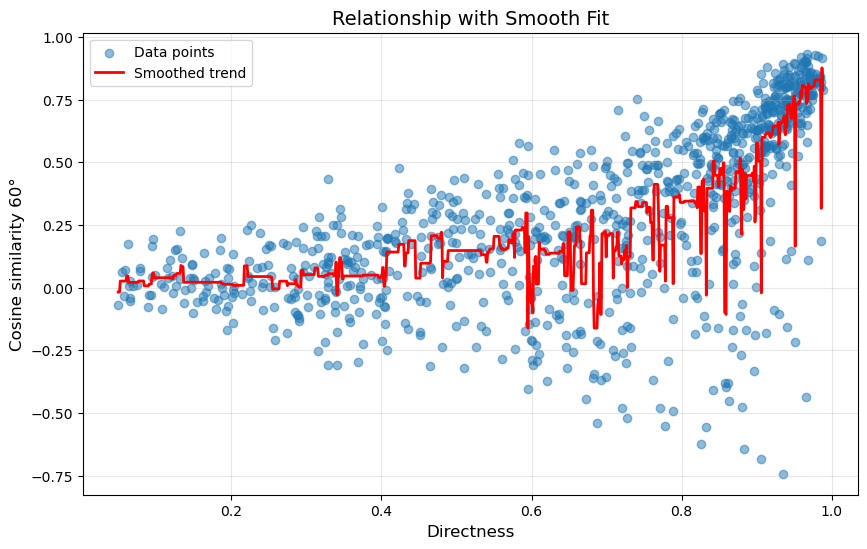

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Data preparation - ensure proper conversion to numpy arrays
cleaned = results4.dropna(subset=["mean_cos_sim_to_60"]).copy()
x = cleaned["directness"].values.reshape(-1, 1)  # Using .values instead of .to_numpy()
y = cleaned["mean_cos_sim_to_60"].values

# Model fitting
model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3)
model.fit(x, y)

# Generate prediction range - ensure we're working with raw numpy values
# Convert to numpy arrays explicitly
x = np.array(cleaned["directness"], dtype=float).reshape(-1, 1)
y = np.array(cleaned["mean_cos_sim_to_60"], dtype=float)

# Get min/max safely
x_min, x_max = float(x.min()), float(x.max())
x_fit = np.linspace(x_min, x_max, 1000).reshape(-1, 1)

# Predict
y_fit = model.predict(x_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.plot(x_fit, y_fit, color='red', linewidth=2, label='Smoothed trend')
plt.xlabel("Directness", fontsize=12)
plt.ylabel("Cosine similarity 60°", fontsize=12)
plt.title("Relationship with Smooth Fit", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

[-0.00307198 -0.00307198  0.03251642  0.03251642  0.03251642  0.03251642
  0.03251642  0.03251642  0.02880988  0.02880988  0.02880988  0.02880988
  0.02880988  0.02880988  0.02880988  0.03439032  0.03439032  0.03439032
  0.03439032  0.01171905  0.01171905  0.01171905  0.02096285  0.02096285
  0.04606865  0.06319698  0.03725778  0.03725778  0.03725778  0.03725778
  0.03725778  0.03725778  0.03725778  0.03725778  0.03725778  0.03725778
  0.03725778  0.03725778  0.03725778  0.03725778  0.03725778  0.03725778
  0.04696655  0.04696655  0.04696655  0.05906293  0.05906293  0.02422086
  0.02422086  0.02422086  0.02422086  0.02422086  0.02422086  0.02422086
  0.02422086  0.02422086  0.02422086  0.02422086  0.02422086  0.02422086
  0.02422086  0.02422086  0.02422086  0.02422086  0.02422086  0.02422086
  0.02422086  0.02422086  0.02422086  0.02422086  0.02422086  0.02422086
  0.02422086  0.02422086  0.02422086  0.02422086  0.02422086  0.02422086
  0.02422086  0.02422086  0.02422086  0.02422086  0

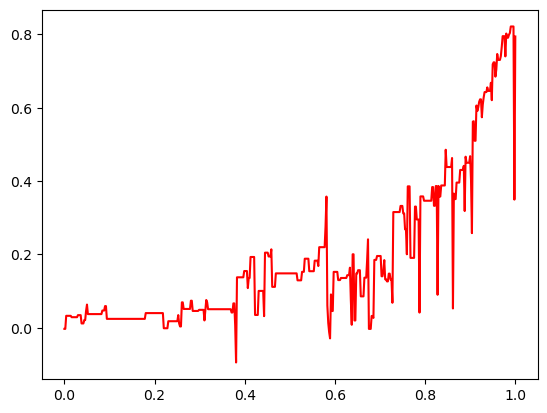

In [86]:
print(y_fit)
x = np.linspace(0, 1,len(y_fit))
plt.plot(x, y_fit, color='red', label='Model Fit')
plt.show()

In [80]:
data = pd.DataFrame({
    "directness": results4["directness"].to_numpy(),
    "mean_cos_sim_to_60": results4["mean_cos_sim_to_60"].to_numpy()
})

# Now clean it
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Extract
x = data["directness"].to_numpy().reshape(-1, 1)
y = data["mean_cos_sim_to_60"].to_numpy()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [71]:
# plt.scatter(results4["mean_cos_sim_to_60"], results4["directness"])
# plt.show()
# for i in sorted(results4["mean_constant_distance"].unique()):
#     results5 = results4[results4["mean_constant_distance"] == i]
#     plt.scatter(results5["directness"], results5["mean_cos_sim_to_60"], color=f'C{i}', label=f"{i}")
#     plt.xlabel("Directness")
#     plt.ylabel("cosine similarity 60°")
#     plt.legend()
# plt.show()


# bad_rows = results4[
#     (results4["directness"].isna()) |
#     (results4["mean_cos_sim_to_60"].isna()) |
#     (np.isinf(results4["directness"])) |
#     (np.isinf(results4["mean_cos_sim_to_60"]))
# ]

# sns.regplot(data=results4, x="directness", y="mean_cos_sim_to_60", order=2)
# plt.show()


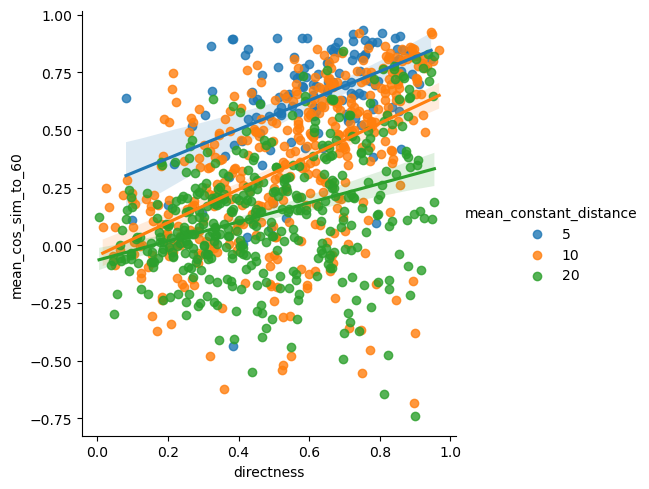

In [26]:
sns.lmplot(data=results4, x="directness", y="mean_cos_sim_to_60", hue="mean_constant_distance")
plt.show()

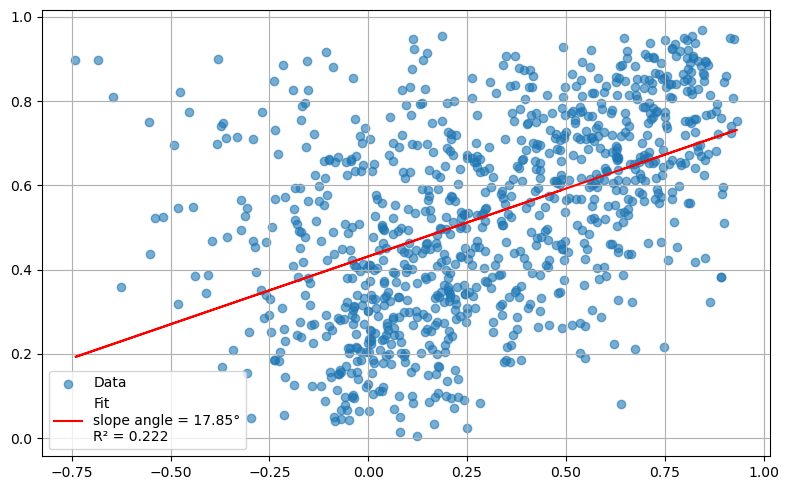

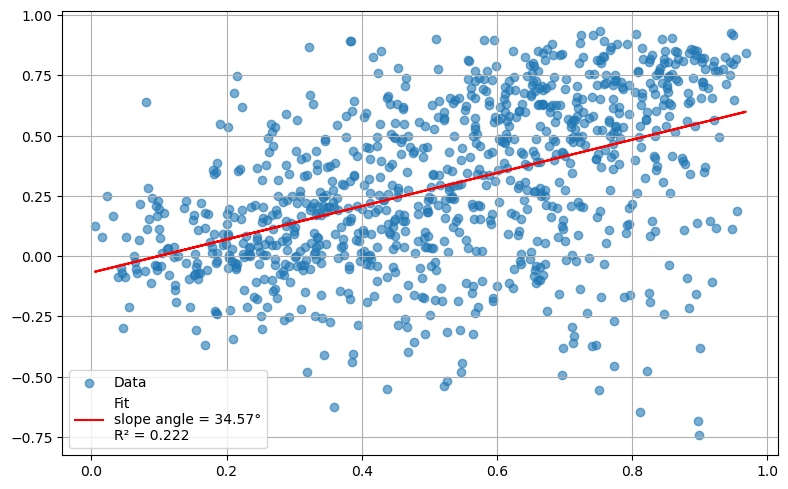

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def plot_linear_fit(x, y, xlabel='', ylabel='', title=''):
    # Drop NaNs
    valid = ~np.isnan(x) & ~np.isnan(y)
    x = np.array(x[valid]).reshape(-1, 1)
    y = np.array(y[valid])

    # Linear regression
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    # Slope angle in degrees
    slope_angle_deg = np.degrees(np.arctan(model.coef_[0]))
    r_squared = r2_score(y, y_pred)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, alpha=0.6, label='Data')
    plt.plot(x, y_pred, color='red', label=f'Fit\nslope angle = {slope_angle_deg:.2f}°\nR² = {r_squared:.3f}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return slope_angle_deg, r_squared
slope_angle_deg, r_squared = plot_linear_fit(results4["mean_cos_sim_to_60"], results4["directness"])
slope_angle_deg, r_squared = plot_linear_fit(results4["directness"], results4["mean_cos_sim_to_60"])

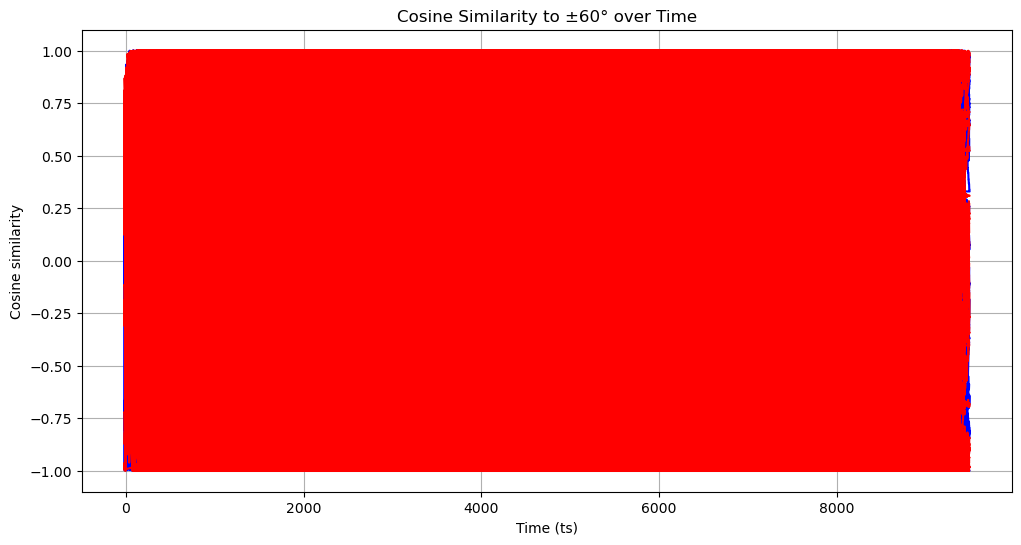

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Filter to ts window
plot_df = df[(df['ts'] >= -20) & (df['ts'] <= 9494)].copy()

# Reference angles in radians
ref_pos = np.radians(60)
ref_neg = np.radians(-60)

# Compute cosine similarities
plot_df['cos_sim_pos60'] = np.cos(plot_df['heading_rel_flip'] - ref_pos)
plot_df['cos_sim_neg60'] = np.cos(plot_df['heading_rel_flip'] - ref_neg)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(plot_df['ts'], plot_df['cos_sim_pos60'], label='Cosine similarity to +60°', color='blue')
plt.plot(plot_df['ts'], plot_df['cos_sim_neg60'], label='Cosine similarity to -60°', color='red')

plt.xlabel('Time (ts)')
plt.ylabel('Cosine similarity')
plt.title('Cosine Similarity to ±60° over Time')
# plt.legend()
plt.grid(True)
plt.show()

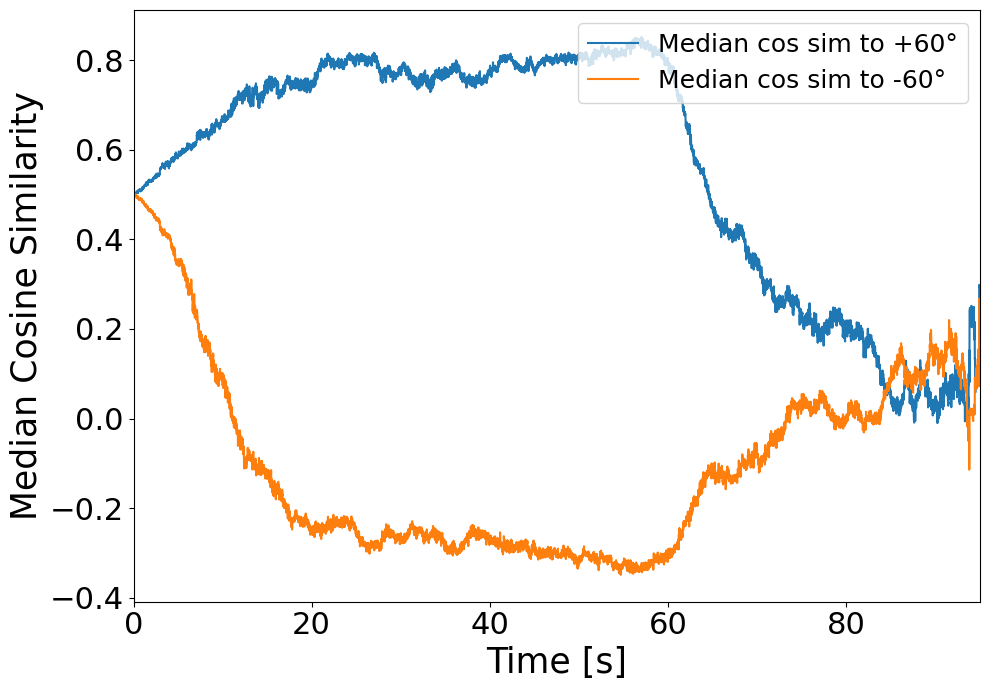

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Filter relevant ts range
plot_df = df[(df['ts'] >= -20) & (df['ts'] <= 9494)].copy()

ref_pos = np.radians(60)
ref_neg = np.radians(-60)

# Compute cosine similarity columns
plot_df['cos_sim_pos60'] = np.cos(plot_df['heading_rel_flip'] - ref_pos)
plot_df['cos_sim_neg60'] = np.cos(plot_df['heading_rel_flip'] - ref_neg)

# Group by timestamp and compute median across rows for each ts
median_cos_sim = plot_df.groupby('ts')[['cos_sim_pos60', 'cos_sim_neg60']].median().reset_index()

# Plot median lines
plt.figure(figsize=(10, 7))
plt.plot(median_cos_sim['ts']/100, median_cos_sim['cos_sim_pos60'], label='Median cos sim to +60°', color='C0')
plt.plot(median_cos_sim['ts']/100, median_cos_sim['cos_sim_neg60'], label='Median cos sim to -60°', color='C1')

default_style(x_label='Time [s]', y_label='Median Cosine Similarity')
plt.xlim(0, 95)
plt.legend(fontsize=18, loc='upper right')
plt.savefig(os.path.join(save_path, f'41.png'), format='png', dpi=1000)

plt.show()

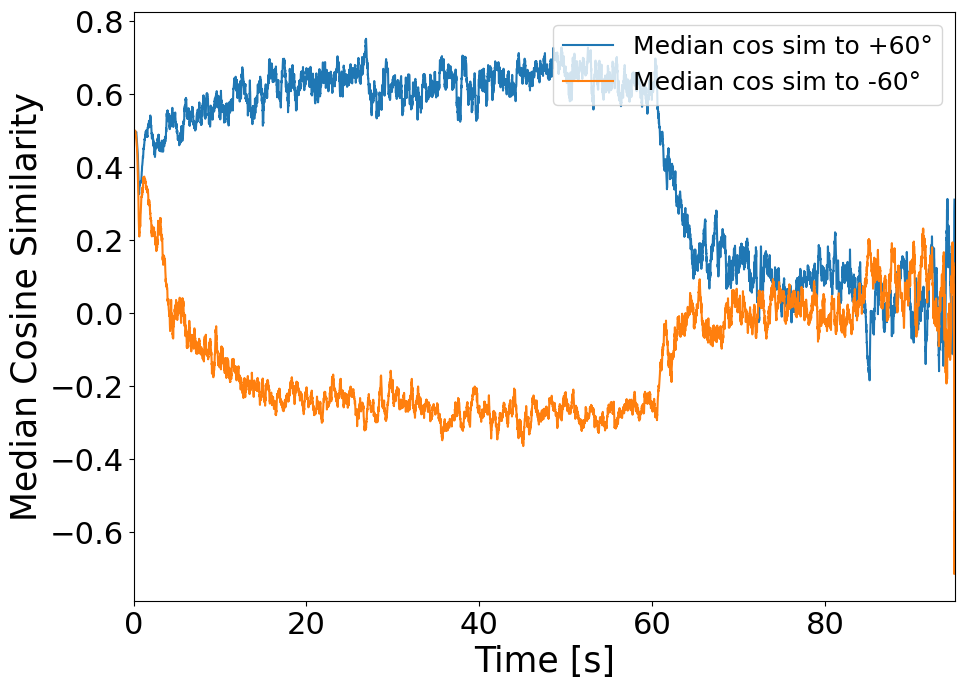

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter time window
plot_df = df[(df['ts'] >= -2000) & (df['ts'] <= 9494)].copy()

# Sort to make sure time is ordered within each group
plot_df = plot_df.sort_values(['animal_id', 'trial_id', 'ts'])

# Compute dx, dy, and trajectory angle per row
plot_df['dx'] = plot_df.groupby(['animal_id', 'trial_id'])['X_aligned'].diff()
plot_df['dy'] = plot_df.groupby(['animal_id', 'trial_id'])['Y_flip'].diff()
plot_df['trajectory_angle'] = np.arctan2(plot_df['dy'], plot_df['dx'])

# Reference angles in radians
ref_pos = np.radians(60)
ref_neg = np.radians(-60)

# Compute cosine similarity to +60° and -60°
plot_df['cos_sim_pos60'] = np.cos(plot_df['trajectory_angle'] - ref_pos)
plot_df['cos_sim_neg60'] = np.cos(plot_df['trajectory_angle'] - ref_neg)

# Remove rows with NaNs (e.g. from .diff() at group starts)
plot_df = plot_df.dropna(subset=['cos_sim_pos60', 'cos_sim_neg60'])

# Group by ts and compute median
median_cos_sim = plot_df.groupby('ts')[['cos_sim_pos60', 'cos_sim_neg60']].median().reset_index()

# Plotting
plt.figure(figsize=(10, 7))
plt.plot(median_cos_sim['ts']/100, median_cos_sim['cos_sim_pos60'], label='Median cos sim to +60°', color='C0')
plt.plot(median_cos_sim['ts']/100, median_cos_sim['cos_sim_neg60'], label='Median cos sim to -60°', color='C1')
# median_cos_sim['ts']>=0,
default_style(x_label='Time [s]', y_label='Median Cosine Similarity')
plt.xlim(0, 95)
plt.legend(fontsize=18, loc='upper right')

plt.savefig(os.path.join(save_path, f'42.png'), format='png', dpi=1000)

plt.show()